# EDSA -Climate Change Belief Analysis 2021

## By Team: Regression_MM2_DSF

### Dimakatso Mongwegelwa
### Reitumetse Nchoe
### Refiloe Dhlamini
### Chantell Machobane
### Emanuel Dikotla
### Neo Sebanze


## Challenge Description 

### Team_MM2 is required to ...

## Dataset Description  

## Notebook Outline 

1. Package Installation
2. Importing Libraries
3. Loading the data
    * Viewing Data
4. Data Cleaning 
5. Exploratory Data Analysis



# Package Installation

In [1]:
#install package
!pip install comet_ml

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="4EuEqkOjsIwdXE8VWzNi6bLvx",
    project_name="mm2",
    workspace="neyocreator",
)

  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19196 sha256=12c73afc6baec980282f8148146e0e6a766add97c918f473fe2d068f4f7fe6d3
  Stored in directory: c:\users\emanuel\appdata\local\pip\cache\wheels\b9\b1\68\cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34549 sha256=e08acd383688c84301a9b4645d3a7b646bc5c1ea10756cd1200d278284f03853
  Stored in directory: c:\users\emanuel\appdata\local\pip\cache\wheels\34\2a\24\a490264ae9041fd48f778ff393526572c80bb498ddecb07ea5
Successfully built nvidia-ml-py3 configobj


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/neyocreator/mm2/fbf5be29b1144f2784947786a9801042



# Importing Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

##Data Cleaning
import nltk #
import itertools
import string #to remove all punctuation marks in the corpus/ document
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

ps = nltk.PorterStemmer()

from sklearn.metrics import classification_report, accuracy_score
# set plot style
sns.set()
# set plot style
sns.set()

# Loading Data 

In [2]:
df_test = pd.read_csv("~/Downloads/Explore/Machine Learning/Advanced Classification/Advanced_Classification_Predict-student_data-2780/first_/first_/test.csv")

df_train = pd.read_csv('~/Downloads/Explore/Machine Learning/Advanced Classification/Advanced_Classification_Predict-student_data-2780/first_/first_/train.csv')

### Viewing the Data

In [3]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
df_sample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [5]:
# checking the dataset Dimensions
print("The shape of the training set is:")
print(df_train.shape) 
print("The shape of the testing set is:")
print(df_test.shape)
# adding the rows of both training and testing set for the total entries
print("the total entries of the dataset")
print(len(df_train) + len(df_test))

The shape of the training set is:
(15819, 3)
The shape of the testing set is:
(10546, 2)
the total entries of the dataset
26365


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Data has 3 columns, numeric and string data types, 15819 tweets and no missing values. Below is the type of sentiments the data contains

In [6]:
#remove any duplicate tweets - tweets the same text as other tweets, 
#for instance multiple retweets of the same original tweet.

df_train.drop_duplicates(subset='message',inplace=True)
df_train.shape

(14229, 3)

We have a difference of 1 590 duplicated tweets which we dropped. From the 14229 entries left, lets try to see how many sentiments we have

In [7]:
type_sentiment = list(df_train.sentiment.unique())
print(type_sentiment)

[1, 2, 0, -1]


We have 4 types of sentiments in our dataset. Now lets see how many data samples we have for each sentiment

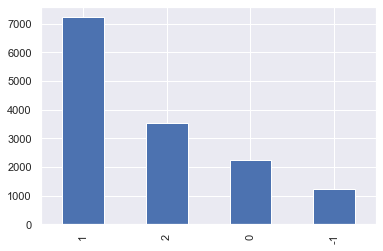

In [8]:
df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

**Up-sample Minority Class**

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

First, we'll import the resampling module from Scikit-Learn:

In [9]:
print(df_train['sentiment'].value_counts())

 1    7222
 2    3542
 0    2244
-1    1221
Name: sentiment, dtype: int64


In [10]:
from sklearn.utils import resample

In [14]:
# Separate majority and minority classes
df_majority = df_train[df_train.sentiment==1]
df_minority2 = df_train[df_train.sentiment==2]
df_minority0 = df_train[df_train.sentiment==0]
df_minority1 = df_train[df_train.sentiment==-1]
 
# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=3640,    # to match majority class
                                 random_state=123) # reproducible results

df_minority0_upsampled = resample(df_minority0, 
                                 replace=True,     # sample with replacement
                                 n_samples=3640,    # to match majority class
                                 random_state=123) # reproducible results

df_minority1_upsampled = resample(df_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=3640,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train = pd.concat([df_minority2, df_majority_downsampled,df_minority0_upsampled,df_minority1_upsampled])
 
# Display new class counts
train.sentiment.value_counts()

-1    3640
 1    3640
 0    3640
 2    3542
Name: sentiment, dtype: int64

In [15]:
train.head()

,sentiment,message,tweetid
2,2,RT @RawStory: Researchers say we have three ye...,698562
12,2,RT @tveitdal: We only have a 5 percent chance ...,454673
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092
26,2,Bangladesh confronting climate change head on ...,365291
32,2,RT @latimes: Atmospheric rivers fueled by clim...,143471


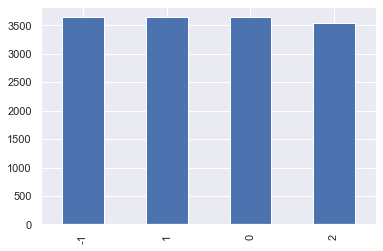

In [16]:
train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

## Data Cleaning 

Removing Noise In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format. Our data contains uppercase letters, special characters as urls, these needs to be removed in the data cleaning process

In [17]:
train.head()

,sentiment,message,tweetid
2,2,RT @RawStory: Researchers say we have three ye...,698562
12,2,RT @tveitdal: We only have a 5 percent chance ...,454673
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092
26,2,Bangladesh confronting climate change head on ...,365291
32,2,RT @latimes: Atmospheric rivers fueled by clim...,143471


In [18]:
#Function to clean data

def clean(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet) #remove mentions
    tweet = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)", tweet) if s]) #split combined words
    tweet = re.sub(r"http\S+", "", tweet) #removes https
    tweet = tweet.lower()
    tweet = re.sub(r'[^\w\s]', '', tweet)
    #tweet = ''.join([l for l in tweet if l not in string.punctuation]) #removes special characters
    tweet = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", tweet)
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    tweet = ' '.join([w for w in tweet.split() if len(w)>2]) #removes any small words less than 3
    tweet = re.sub("\S*\d\S*", "", tweet).strip() #removes numbers and words with numbers
    #tweet = re.sub(r'\b\d+(?:\.\d+)?\s+', '', tweet) #removes numbers
    return tweet

train['prep_text'] = df_train['message'].apply(clean)

train.head(10)

,sentiment,message,tweetid,prep_text
2,2,RT @RawStory: Researchers say we have three ye...,698562,researchers say have three years act climate c...
12,2,RT @tveitdal: We only have a 5 percent chance ...,454673,only have percent chance avoiding dangerous gl...
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092,fossil fuel giant exxon mobil misled the publi...
26,2,Bangladesh confronting climate change head on ...,365291,bangladesh confronting climate change head tqe...
32,2,RT @latimes: Atmospheric rivers fueled by clim...,143471,atmospheric rivers fueled climate change could...
36,2,RT @Independent: Trump's team removed climate ...,526603,trumps team removed climate change data from t...
41,2,2050 climate targets: nations are playing the ...,8984,climate targets nations are playing the long g...
44,2,RT @washingtonpost: The Alaskan tundra is fill...,905639,the alaskan tundra filling the atmosphere with...
45,2,RT @TheTorontoSun: From @sunlorrie: Indian env...,741568,from indian environmentalist calls out caprio ...
49,2,RT @Starbuck: World food supplies at risk as #...,499888,world food supplies risk climate change threat...


In [19]:
train.tail()

,sentiment,message,tweetid,prep_text
3660,-1,@thehill The ONLY remedy to cure global warmin...,3275,the only remedy cure global warming write chec...
5357,-1,RT @WalshFreedom: Trump picks someone to head ...,607528,trump picks someone head the epa who has the n...
227,-1,@zrastall17 climate change is #fakenews,3014,climate change fakenews
11468,-1,I know!! How come no one ever talks about the ...,601361,know how come one ever talks about the good ki...
4191,-1,RT @realDonaldTrump: They changed the name fro...,320842,they changed the name from global warming clim...


In [19]:
# check packages to correct spelling
#check packages to translate non-english words to english

In [20]:
train.tail(10)

,sentiment,message,tweetid,prep_text
6759,-1,RT @RyanMaue: Just read through the study supp...,652808,just read through the study supposedly entirel...
8497,-1,"Gosh, It's cold in the morning and hot in the ...",869303,gosh its cold the morning and hot the afternoo...
11247,-1,"@nodank_ No I am not, I am on the side of the ...",103721,not the side the scientists who disagree with ...
13712,-1,From lowering oil price to climate change prop...,517638,from lowering oil price climate change propaga...
2587,-1,RT @KaptKan1: The Russians are making the clim...,756968,the russians are making the climate change
3660,-1,@thehill The ONLY remedy to cure global warmin...,3275,the only remedy cure global warming write chec...
5357,-1,RT @WalshFreedom: Trump picks someone to head ...,607528,trump picks someone head the epa who has the n...
227,-1,@zrastall17 climate change is #fakenews,3014,climate change fakenews
11468,-1,I know!! How come no one ever talks about the ...,601361,know how come one ever talks about the good ki...
4191,-1,RT @realDonaldTrump: They changed the name fro...,320842,they changed the name from global warming clim...


## Exploratory Data Analysis

### 5.1 Univaraite Data analysis

#### Univariate Analysis: Graphical

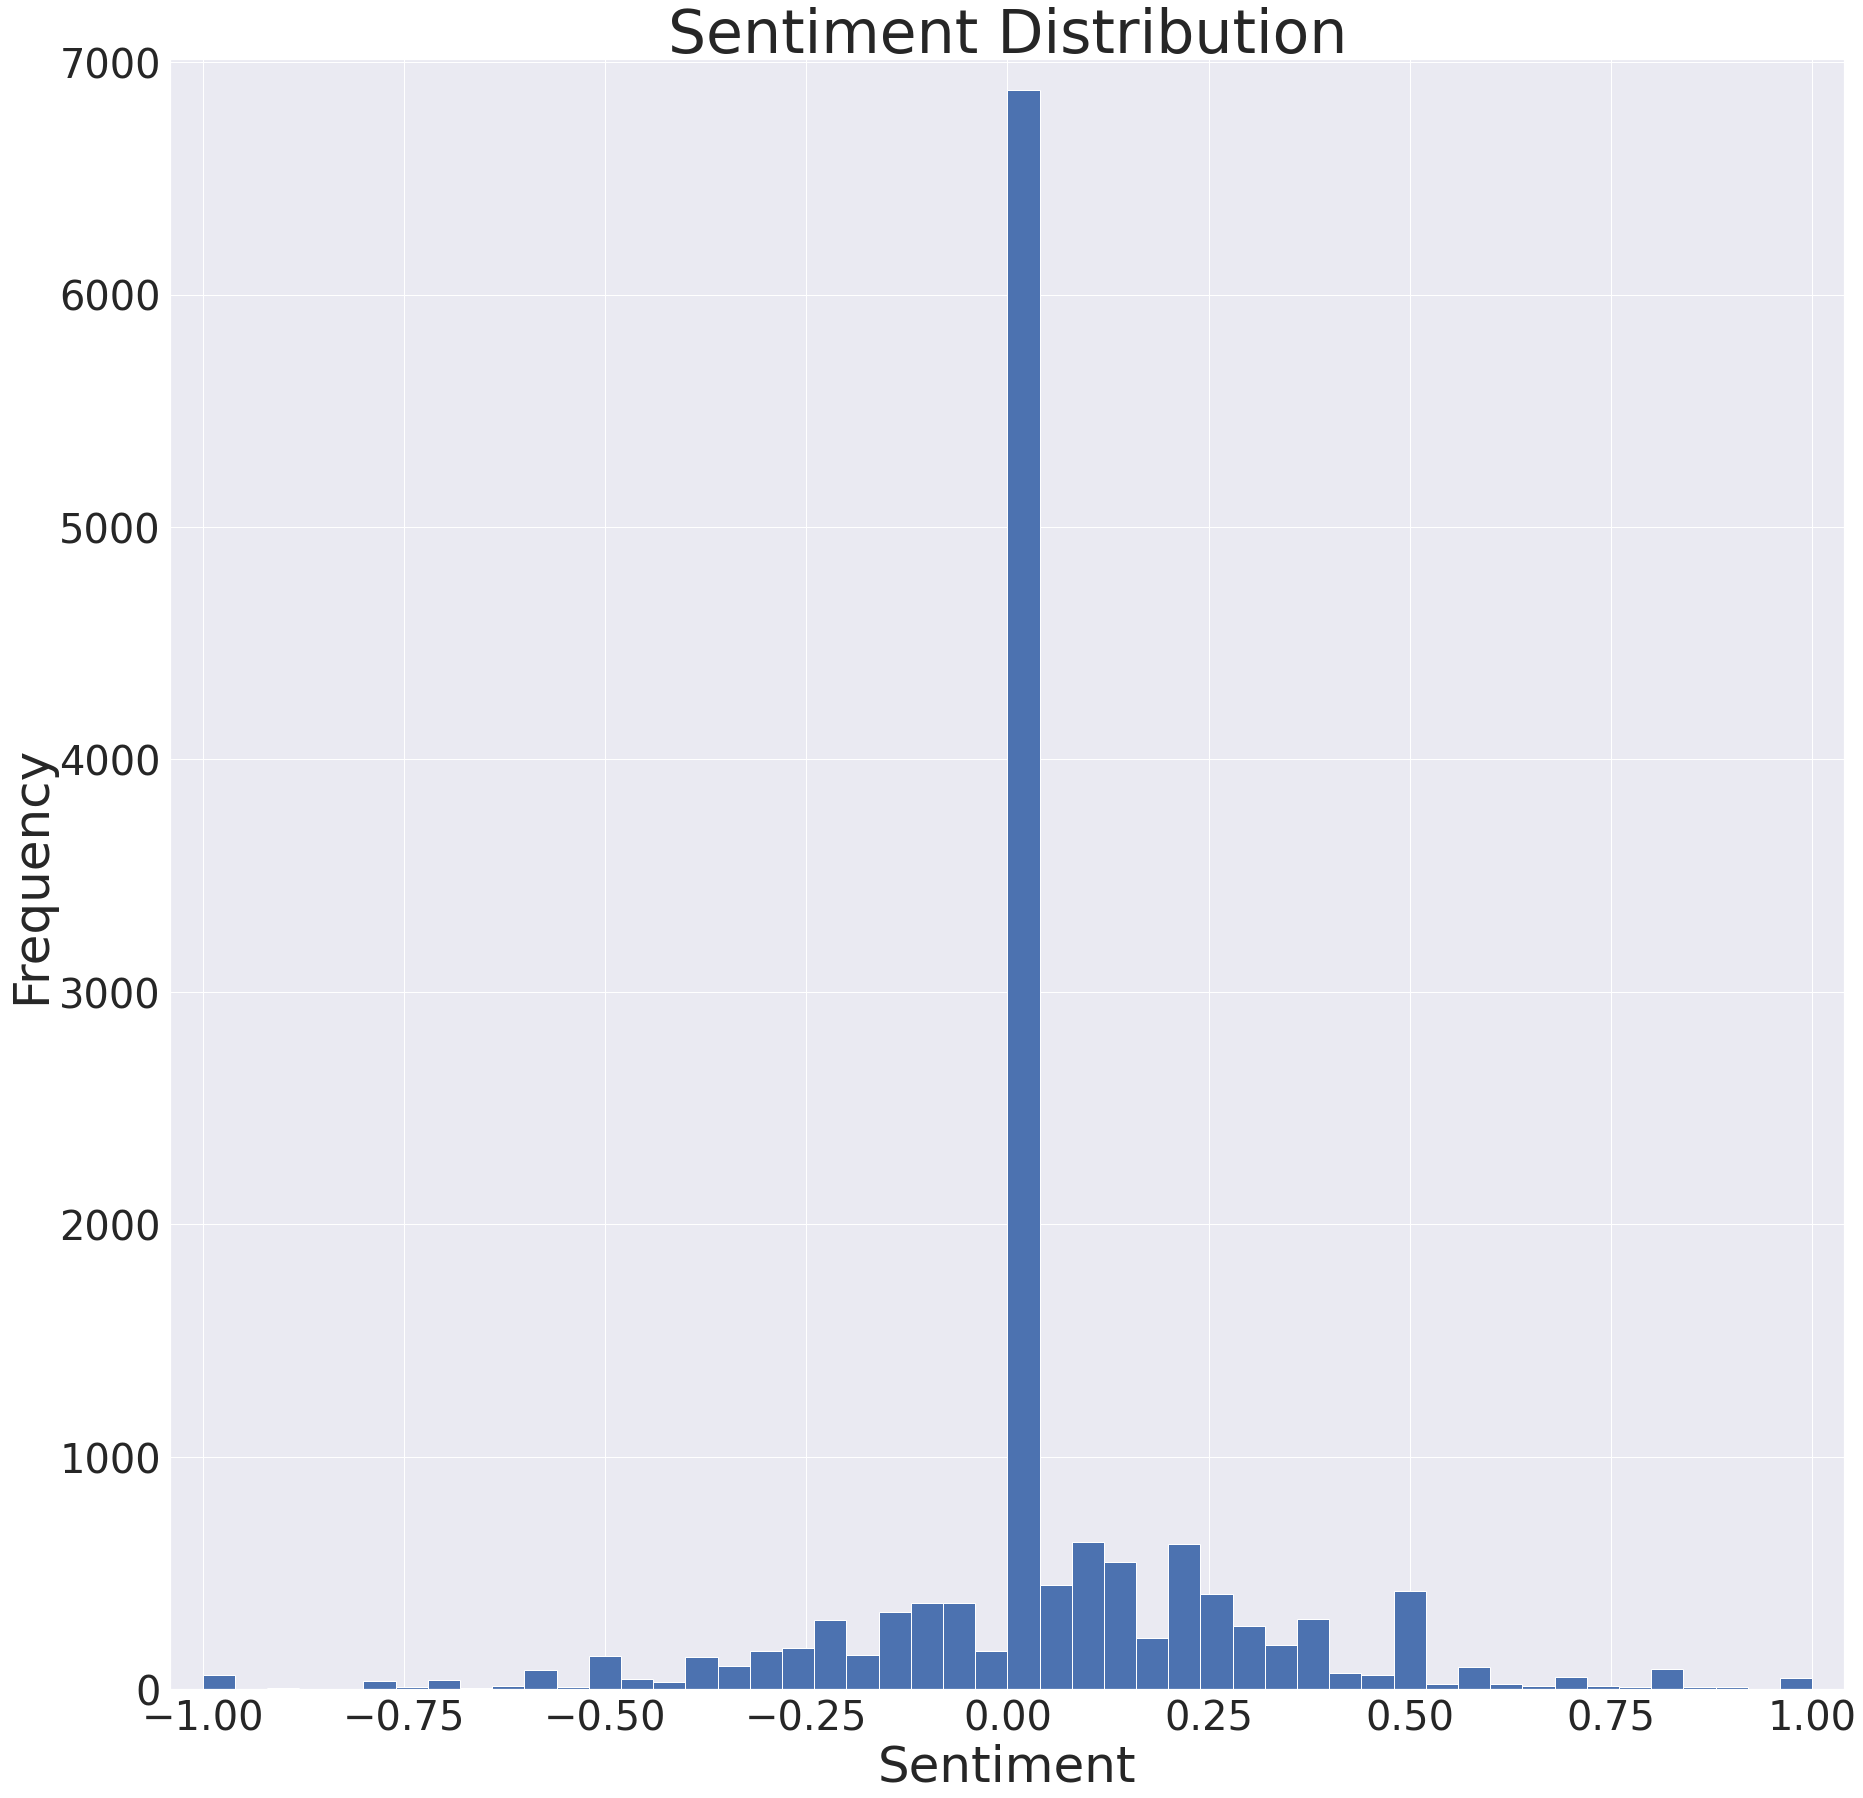

In [26]:

#Compare the sentiment analysis 
from textblob import TextBlob
train['sentiment'] = train['message'].apply(lambda x:TextBlob(x).sentiment.polarity)
plt.figure(figsize=(30,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df_train['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

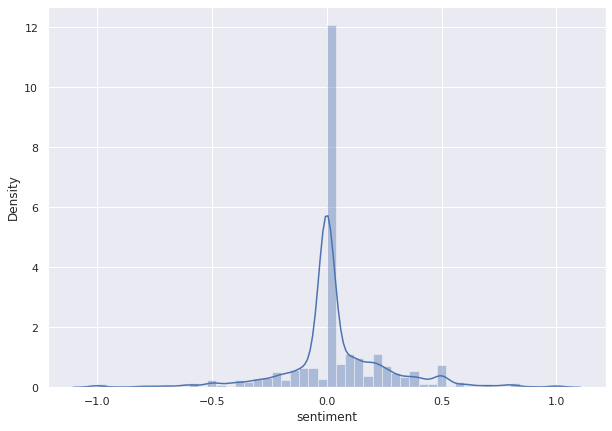

In [27]:
# Checking the distribution of the sentiment column
plt.subplots(figsize=(10,7))
sns.distplot(train['sentiment'],kde=True)

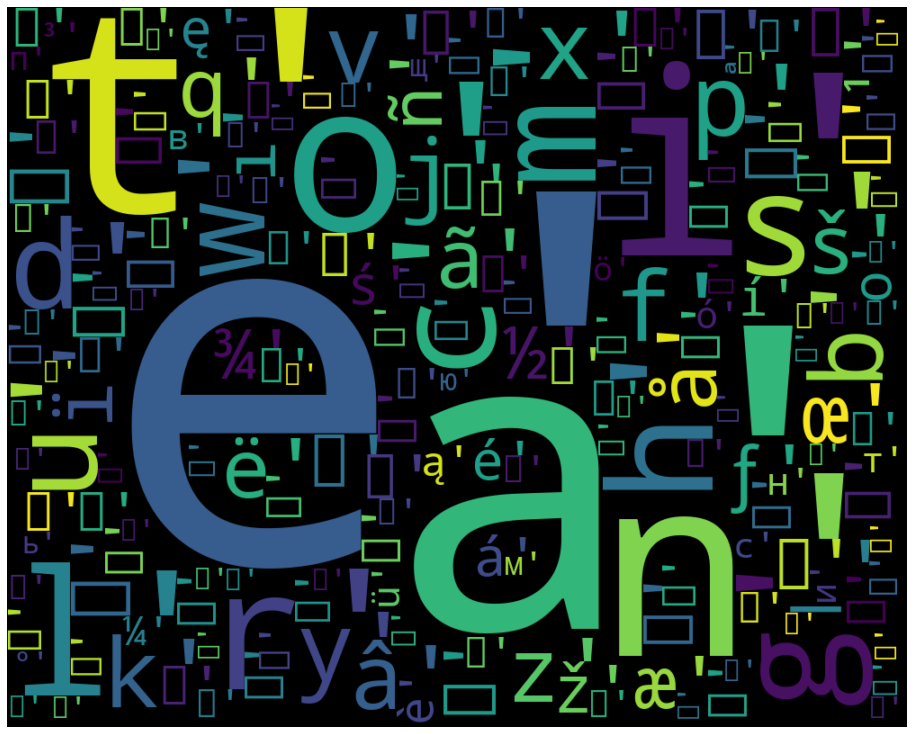

In [22]:
words = train['prep_text']
allwords = []
for wordlist in words:
    allwords += wordlist
    
mostcommon = FreqDist(allwords).most_common(1000)
wordcloud = WordCloud(width=1000, height=800, background_color='black').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Feature Extraction

In [ ]:
df_sample.to_csv('submission.csv', index = False)

# 0.remove urls

In [24]:
### Remove urls and replace them with the word 'url-web'
#Our data doesn't seem to have any urls, adding code just in case
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train['message'] = train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

##Convert all lowercase to uppercase
train['message'] = train['message'].str.lower()

### Remove special characters, symbols
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

train['message'] = train['message'].apply(remove_punctuation)

train.head()

,sentiment,message,tweetid,prep_text
2,2,rt rawstory researchers say we have three year...,698562,researchers say have three years act climate c...
12,2,rt tveitdal we only have a 5 percent chance of...,454673,only have percent chance avoiding dangerous gl...
14,2,fossil fuel giant exxonmobil ‘misled’ the publ...,658092,fossil fuel giant exxon mobil misled the publi...
26,2,bangladesh confronting climate change head on ...,365291,bangladesh confronting climate change head tqe...
32,2,rt latimes atmospheric rivers fueled by climat...,143471,atmospheric rivers fueled climate change could...


# 1. Punctuation

In [25]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
#1.1 remove the punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

train['punctuation']=train['message'].apply(lambda x: remove_punctuation(x))
train.head()

,sentiment,message,tweetid,prep_text,punctuation
2,2,rt rawstory researchers say we have three year...,698562,researchers say have three years act climate c...,rt rawstory researchers say we have three year...
12,2,rt tveitdal we only have a 5 percent chance of...,454673,only have percent chance avoiding dangerous gl...,rt tveitdal we only have a 5 percent chance of...
14,2,fossil fuel giant exxonmobil ‘misled’ the publ...,658092,fossil fuel giant exxon mobil misled the publi...,fossil fuel giant exxonmobil ‘misled’ the publ...
26,2,bangladesh confronting climate change head on ...,365291,bangladesh confronting climate change head tqe...,bangladesh confronting climate change head on ...
32,2,rt latimes atmospheric rivers fueled by climat...,143471,atmospheric rivers fueled climate change could...,rt latimes atmospheric rivers fueled by climat...


# 2.Tokenization

A tokeniser divides text into a sequence of tokens. We will use tokenisers to clean up the data, making it ready for analysis.

In [27]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split
train['tokenized']=train['punctuation'].apply(lambda x: tokenize(x.lower()))
train.head()

,sentiment,message,tweetid,prep_text,punctuation,tokenized
2,2,rt rawstory researchers say we have three year...,698562,researchers say have three years act climate c...,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr..."
12,2,rt tveitdal we only have a 5 percent chance of...,454673,only have percent chance avoiding dangerous gl...,rt tveitdal we only have a 5 percent chance of...,"[rt, tveitdal, we, only, have, a, 5, percent, ..."
14,2,fossil fuel giant exxonmobil ‘misled’ the publ...,658092,fossil fuel giant exxon mobil misled the publi...,fossil fuel giant exxonmobil ‘misled’ the publ...,"[fossil, fuel, giant, exxonmobil, misled, the,..."
26,2,bangladesh confronting climate change head on ...,365291,bangladesh confronting climate change head tqe...,bangladesh confronting climate change head on ...,"[bangladesh, confronting, climate, change, hea..."
32,2,rt latimes atmospheric rivers fueled by climat...,143471,atmospheric rivers fueled climate change could...,rt latimes atmospheric rivers fueled by climat...,"[rt, latimes, atmospheric, rivers, fueled, by,..."


# 3.Stop words

Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.

In [28]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [29]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
train['stopwords'] = train['tokenized'].apply(lambda x: remove_stopwords(x))
train.head()

,sentiment,message,tweetid,prep_text,punctuation,tokenized,stopwords
2,2,rt rawstory researchers say we have three year...,698562,researchers say have three years act climate c...,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,..."
12,2,rt tveitdal we only have a 5 percent chance of...,454673,only have percent chance avoiding dangerous gl...,rt tveitdal we only have a 5 percent chance of...,"[rt, tveitdal, we, only, have, a, 5, percent, ...","[rt, tveitdal, 5, percent, chance, avoiding, d..."
14,2,fossil fuel giant exxonmobil ‘misled’ the publ...,658092,fossil fuel giant exxon mobil misled the publi...,fossil fuel giant exxonmobil ‘misled’ the publ...,"[fossil, fuel, giant, exxonmobil, misled, the,...","[fossil, fuel, giant, exxonmobil, misled, publ..."
26,2,bangladesh confronting climate change head on ...,365291,bangladesh confronting climate change head tqe...,bangladesh confronting climate change head on ...,"[bangladesh, confronting, climate, change, hea...","[bangladesh, confronting, climate, change, hea..."
32,2,rt latimes atmospheric rivers fueled by climat...,143471,atmospheric rivers fueled climate change could...,rt latimes atmospheric rivers fueled by climat...,"[rt, latimes, atmospheric, rivers, fueled, by,...","[rt, latimes, atmospheric, rivers, fueled, cli..."


# 4.Lemmatisation

Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [30]:
#nltk.download('wordnet')
def train_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

lemmatizer = WordNetLemmatizer()

train['lemma'] = train['stopwords'].apply(train_lemma, args=(lemmatizer, ))

In [31]:
# view dataset
train

,sentiment,message,tweetid,prep_text,punctuation,tokenized,stopwords,lemma
2,2,rt rawstory researchers say we have three year...,698562,researchers say have three years act climate c...,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...","[rt, rawstory, researcher, say, three, year, a..."
12,2,rt tveitdal we only have a 5 percent chance of...,454673,only have percent chance avoiding dangerous gl...,rt tveitdal we only have a 5 percent chance of...,"[rt, tveitdal, we, only, have, a, 5, percent, ...","[rt, tveitdal, 5, percent, chance, avoiding, d...","[rt, tveitdal, 5, percent, chance, avoiding, d..."
14,2,fossil fuel giant exxonmobil ‘misled’ the publ...,658092,fossil fuel giant exxon mobil misled the publi...,fossil fuel giant exxonmobil ‘misled’ the publ...,"[fossil, fuel, giant, exxonmobil, misled, the,...","[fossil, fuel, giant, exxonmobil, misled, publ...","[fossil, fuel, giant, exxonmobil, misled, publ..."
26,2,bangladesh confronting climate change head on ...,365291,bangladesh confronting climate change head tqe...,bangladesh confronting climate change head on ...,"[bangladesh, confronting, climate, change, hea...","[bangladesh, confronting, climate, change, hea...","[bangladesh, confronting, climate, change, hea..."
32,2,rt latimes atmospheric rivers fueled by climat...,143471,atmospheric rivers fueled climate change could...,rt latimes atmospheric rivers fueled by climat...,"[rt, latimes, atmospheric, rivers, fueled, by,...","[rt, latimes, atmospheric, rivers, fueled, cli...","[rt, latimes, atmospheric, river, fueled, clim..."
...,...,...,...,...,...,...,...,...
3660,-1,thehill the only remedy to cure global warming...,3275,the only remedy cure global warming write chec...,thehill the only remedy to cure global warming...,"[thehill, the, only, remedy, to, cure, global,...","[thehill, remedy, cure, global, warming, write...","[thehill, remedy, cure, global, warming, write..."
5357,-1,rt walshfreedom trump picks someone to head up...,607528,trump picks someone head the epa who has the n...,rt walshfreedom trump picks someone to head up...,"[rt, walshfreedom, trump, picks, someone, to, ...","[rt, walshfreedom, trump, picks, someone, head...","[rt, walshfreedom, trump, pick, someone, head,..."
227,-1,zrastall17 climate change is fakenews,3014,climate change fakenews,zrastall17 climate change is fakenews,"[zrastall17, climate, change, is, fakenews]","[zrastall17, climate, change, fakenews]","[zrastall17, climate, change, fakenews]"
11468,-1,i know how come no one ever talks about the go...,601361,know how come one ever talks about the good ki...,i know how come no one ever talks about the go...,"[i, know, how, come, no, one, ever, talks, abo...","[know, come, one, ever, talks, good, kind, cli...","[know, come, one, ever, talk, good, kind, clim..."


# 5.Split the data 

In [32]:
X = train['lemma']
y = train['sentiment']

In [33]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# 6. vectorize the data 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
def clean_title(text):
   text = " ".join([word.lower() for word in text if word not in string.punctuation])
   title = re.split('\W+', text)
   text = [ps.stem(word) for word in title if word not in nltk.corpus.stopwords.words('english')]
   return text

In [36]:
#create vector object
cv = CountVectorizer(analyzer=clean_title) 

# transfrom the values based on X_train
X_train_vect = cv.fit_transform(X_train).toarray()

In [37]:
#transform the values X_test
X_test_vect = cv.transform(X_test).toarray()

In [38]:
#convert y_train to array
y_train_vect = np.array(y_train)

# multinomial Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB 

In [43]:
mn = MultinomialNB()

In [44]:
mn.fit(X_train_vect, y_train_vect)

MultinomialNB()

In [45]:
y_pred = mn.predict(X_test_vect)

In [46]:
print("The accuracy score of the multinomial Naive Bayes is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the multinomial Naive Bayes is: 0.7694434842723816


Classification Report:

               precision    recall  f1-score   support

          -1       0.82      0.91      0.87       721
           0       0.85      0.66      0.74       741
           1       0.68      0.62      0.65       709
           2       0.74      0.88      0.80       722

    accuracy                           0.77      2893
   macro avg       0.77      0.77      0.77      2893
weighted avg       0.77      0.77      0.77      2893

